<h1 style='color:midnightBlue' align='center'>Political Leader's Image Detection<h1>

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

<h2 style='color:midnightBlue'>(1) Preprocessing: Detect face and eyes</h2>

In [2]:
img = cv2.imread('./test_images/imran.jpg')
img.shape

(1200, 1200, 3)

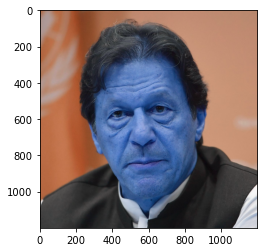

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1200, 1200)

In [5]:
gray

array([[104, 102, 101, ..., 133, 133, 132],
       [ 99,  98,  99, ..., 133, 133, 132],
       [ 97,  97,  98, ..., 133, 133, 132],
       ...,
       [ 50,  52,  54, ..., 199, 202, 205],
       [ 53,  54,  55, ..., 195, 201, 203],
       [ 56,  57,  57, ..., 193, 201, 201]], dtype=uint8)

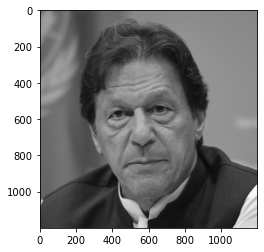

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[228, 302, 652, 652]], dtype=int32)

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(228, 302, 652, 652)

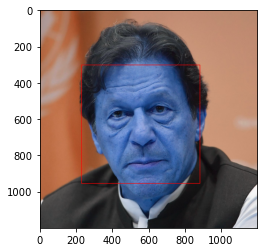

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

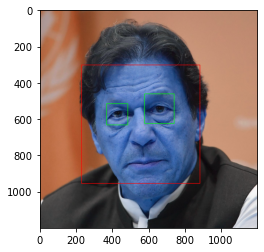

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

<h2 style='color:midnightBlue'>(2) Preprocessing: Crop the facial region of the image</h2>

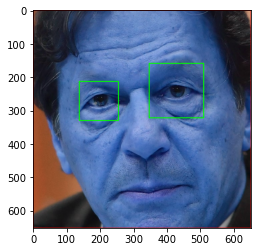

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(652, 652, 3)

<h2 style='color:midnightBlue'>(3) Preprocessing: Use wavelet transform as a feature for traning our model</h2>

### Wavelet transform

In [13]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

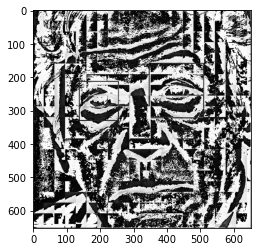

In [14]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [15]:
im_har.shape

(652, 652)

<h2 style='color:midnightBlue'>(4) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region</h2>

In [16]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

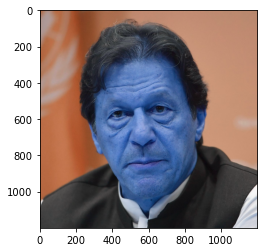

In [17]:
original_image = cv2.imread('./test_images/imran.jpg')
plt.imshow(original_image)

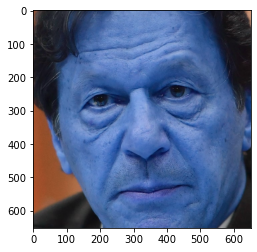

In [18]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/imran.jpg')
plt.imshow(cropped_image)

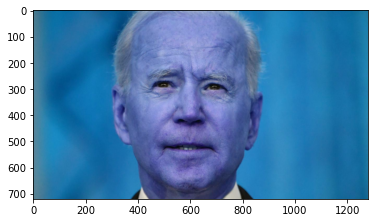

In [19]:
org_image_obstructed = cv2.imread('./test_images/bieden.jpg')
plt.imshow(org_image_obstructed)

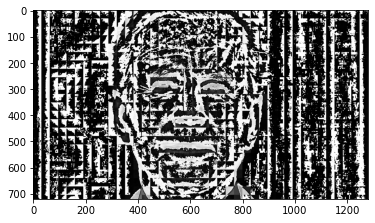

In [20]:
im_har = w2d(org_image_obstructed,'db1',5)
plt.imshow(im_har, cmap='gray')

In [21]:
im_har.shape

(720, 1280)

In [22]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/bieden.jpg')
cropped_image_no_2_eyes

array([[[ 30,  84, 131],
        [ 28,  83, 126],
        [ 46, 100, 141],
        ...,
        [ 78, 138, 184],
        [ 74, 140, 191],
        [ 69, 139, 193]],

       [[ 32,  87, 132],
        [ 36,  89, 132],
        [ 62, 113, 153],
        ...,
        [ 73, 132, 177],
        [ 74, 139, 190],
        [ 71, 138, 193]],

       [[ 38,  93, 136],
        [ 52, 106, 147],
        [ 70, 117, 155],
        ...,
        [ 74, 132, 174],
        [ 69, 132, 182],
        [ 66, 132, 185]],

       ...,

       [[ 24, 113, 174],
        [ 23, 112, 173],
        [ 24, 111, 173],
        ...,
        [ 36, 135, 197],
        [ 37, 132, 195],
        [ 37, 132, 195]],

       [[ 24, 113, 174],
        [ 24, 113, 174],
        [ 26, 113, 175],
        ...,
        [ 31, 130, 192],
        [ 38, 133, 196],
        [ 37, 132, 195]],

       [[ 24, 113, 174],
        [ 24, 113, 174],
        [ 26, 113, 175],
        ...,
        [ 31, 130, 192],
        [ 37, 132, 195],
        [ 36, 131, 194]]

In [23]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [24]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [25]:
img_dirs

['./dataset/cropped',
 './dataset/imran_khan',
 './dataset/joe_biden',
 './dataset/momota_banerjee',
 './dataset/sheikh_hasina',
 './dataset/vladimir_putin']

**Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code**

In [26]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [27]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:                                   # roi = reason of interest
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

cropped
imran_khan
Generating cropped images in folder:  ./dataset/cropped/imran_khan
joe_biden
Generating cropped images in folder:  ./dataset/cropped/joe_biden
momota_banerjee
Generating cropped images in folder:  ./dataset/cropped/momota_banerjee
sheikh_hasina
Generating cropped images in folder:  ./dataset/cropped/sheikh_hasina
vladimir_putin
Generating cropped images in folder:  ./dataset/cropped/vladimir_putin


### Manually examine cropped folder and delete any unwanted images

In [28]:
celebrity_file_names_dict

{'cropped': [],
 'imran_khan': ['./dataset/cropped/imran_khan/imran_khan1.png',
  './dataset/cropped/imran_khan/imran_khan2.png',
  './dataset/cropped/imran_khan/imran_khan3.png',
  './dataset/cropped/imran_khan/imran_khan4.png',
  './dataset/cropped/imran_khan/imran_khan5.png',
  './dataset/cropped/imran_khan/imran_khan6.png',
  './dataset/cropped/imran_khan/imran_khan7.png',
  './dataset/cropped/imran_khan/imran_khan8.png',
  './dataset/cropped/imran_khan/imran_khan9.png',
  './dataset/cropped/imran_khan/imran_khan10.png',
  './dataset/cropped/imran_khan/imran_khan11.png',
  './dataset/cropped/imran_khan/imran_khan12.png',
  './dataset/cropped/imran_khan/imran_khan13.png',
  './dataset/cropped/imran_khan/imran_khan14.png',
  './dataset/cropped/imran_khan/imran_khan15.png',
  './dataset/cropped/imran_khan/imran_khan16.png',
  './dataset/cropped/imran_khan/imran_khan17.png',
  './dataset/cropped/imran_khan/imran_khan18.png',
  './dataset/cropped/imran_khan/imran_khan19.png',
  './datas

In [29]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'imran_khan': ['./dataset/cropped/imran_khan\\imran_khan1.png',
  './dataset/cropped/imran_khan\\imran_khan10.png',
  './dataset/cropped/imran_khan\\imran_khan11.png',
  './dataset/cropped/imran_khan\\imran_khan12.png',
  './dataset/cropped/imran_khan\\imran_khan13.png',
  './dataset/cropped/imran_khan\\imran_khan14.png',
  './dataset/cropped/imran_khan\\imran_khan15.png',
  './dataset/cropped/imran_khan\\imran_khan16.png',
  './dataset/cropped/imran_khan\\imran_khan17.png',
  './dataset/cropped/imran_khan\\imran_khan18.png',
  './dataset/cropped/imran_khan\\imran_khan19.png',
  './dataset/cropped/imran_khan\\imran_khan2.png',
  './dataset/cropped/imran_khan\\imran_khan20.png',
  './dataset/cropped/imran_khan\\imran_khan21.png',
  './dataset/cropped/imran_khan\\imran_khan22.png',
  './dataset/cropped/imran_khan\\imran_khan23.png',
  './dataset/cropped/imran_khan\\imran_khan24.png',
  './dataset/cropped/imran_khan\\imran_khan25.png',
  './dataset/cropped/imran_khan\\imran_khan26.png',


In [30]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'imran_khan': 0,
 'joe_biden': 1,
 'momota_banerjee': 2,
 'sheikh_hasina': 3,
 'vladimir_putin': 4}

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [31]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [32]:
X[5].shape

(4096, 1)

In [33]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(297, 4096)

### Data cleaning process is done. Now we are ready to train our model

In [34]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [35]:
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9066666666666666

In [36]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.88      0.94      0.91        16
           2       1.00      0.73      0.84        11
           3       1.00      0.88      0.93         8
           4       0.90      1.00      0.95        28

    accuracy                           0.91        75
   macro avg       0.92      0.87      0.89        75
weighted avg       0.91      0.91      0.90        75



### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [37]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [38]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [39]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.860202,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.616768,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.865051,{'logisticregression__C': 1}


In [40]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [41]:
best_estimators['svm'].score(X_test,y_test)

0.8933333333333333

In [42]:
best_estimators['random_forest'].score(X_test,y_test)

0.72

In [43]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9066666666666666

In [44]:
best_clf = best_estimators['svm']

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[11,  0,  0,  0,  1],
       [ 0, 15,  0,  0,  1],
       [ 4,  0,  7,  0,  0],
       [ 0,  1,  0,  7,  0],
       [ 1,  0,  0,  0, 27]], dtype=int64)

Text(69.0, 0.5, 'Truth')

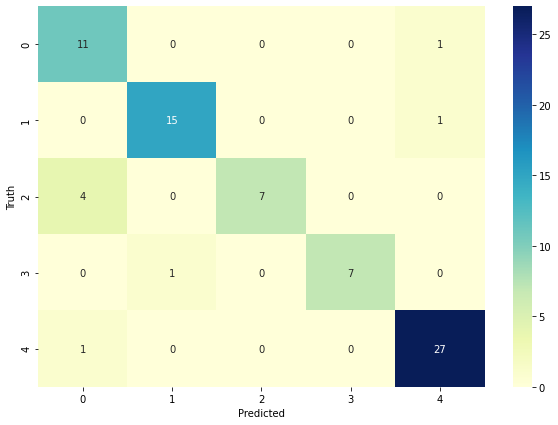

In [46]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
class_dict

{'imran_khan': 0,
 'joe_biden': 1,
 'momota_banerjee': 2,
 'sheikh_hasina': 3,
 'vladimir_putin': 4}

### Save the trained model

In [48]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

### Save class dictionary

In [49]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))